# 연령대에 따른 데이터 분석


In [106]:
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("data.csv")
data.drop(["index"], axis=1, inplace=True)
data.drop(["QaA", "QaE", "QdA", "QdE", "QgA", "QgE", "QiA", "QiE", "QlA", "QlE", "QnA", "QnE", "QpA", "QpE", "QtA", "QtE"], axis=1, inplace=True)
data.head()

,QbA,QbE,QcA,QcE,QeA,QeE,QfA,QfE,QhA,QhE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,4.0,1370,5.0,997,2.0,1577,5.0,539,4.0,1095,...,0,1,0,1,1,0,1,0,1,1
1,5.0,1313,3.0,3387,1.0,4320,3.0,2190,1.0,4082,...,1,1,0,1,1,0,1,0,1,1
2,1.0,1480,1.0,1021,5.0,1333,1.0,531,1.0,1016,...,1,1,0,1,1,1,1,0,1,1
3,3.0,2311,4.0,992,1.0,357,2.0,1519,3.0,2275,...,0,0,0,0,1,0,1,0,1,1
4,1.0,707,5.0,556,1.0,1014,2.0,628,1.0,1259,...,1,1,1,1,1,0,1,1,1,1


## QeA에 대한 답변 분석

QeA: 잘 속는 사람이 매분마다 태어난다고 말한 P.T. 바넘의 말은 틀렸다. 

In [73]:
pivot1 = pd.pivot_table(data = data, index = "QeA", columns = "age_group", aggfunc = "size", fill_value = 0)
pivot1

age_group,+70s,10s,20s,30s,40s,50s,60s
QeA,,,,,,,
1.0,80,5174,5541,3337,2060,1147,442
2.0,39,3453,3268,1736,1127,594,242
3.0,22,2803,2413,1061,606,302,114
4.0,43,1463,1424,854,610,400,182
5.0,51,1322,1466,848,648,446,214


In [74]:
# 50,60,70대 이상을 50대로 합치기
pivot1['50s'] = pivot1['50s'] + pivot1['60s'] + pivot1['+70s']
pivot1 

age_group,+70s,10s,20s,30s,40s,50s,60s
QeA,,,,,,,
1.0,80,5174,5541,3337,2060,1669,442
2.0,39,3453,3268,1736,1127,875,242
3.0,22,2803,2413,1061,606,438,114
4.0,43,1463,1424,854,610,625,182
5.0,51,1322,1466,848,648,711,214


In [77]:
# 60, 70대 제거
pivot2 = pivot1.drop(['60s', '+70s'], axis=1)
pivot2

age_group,10s,20s,30s,40s,50s
QeA,,,,,
1.0,5174,5541,3337,2060,1669
2.0,3453,3268,1736,1127,875
3.0,2803,2413,1061,606,438
4.0,1463,1424,854,610,625
5.0,1322,1466,848,648,711


In [78]:
# 숫자를 퍼센트 비율로 바꾸기
pivot2['10s'] = (pivot2['10s']/pivot2['10s'].sum()) * 100
pivot2['20s'] = (pivot2['20s']/pivot2['20s'].sum()) * 100
pivot2['30s'] = (pivot2['30s']/pivot2['30s'].sum()) * 100
pivot2['40s'] = (pivot2['40s']/pivot2['40s'].sum()) * 100
pivot2['50s'] = (pivot2['50s']/pivot2['50s'].sum()) * 100
pivot2

age_group,10s,20s,30s,40s,50s
QeA,,,,,
1.0,36.398171,39.264456,42.585503,40.784003,38.652154
2.0,24.291242,23.157596,22.154160,22.312413,20.264011
3.0,19.718607,17.098923,13.540071,11.997624,10.143585
4.0,10.291945,10.090703,10.898418,12.076816,14.474294
5.0,9.300035,10.388322,10.821848,12.829143,16.465956


In [149]:
# 파이차트
number1 = [5174, 3453, 2803, 1463, 1322]
number2 = [5541, 3268, 2413, 1424, 1466]
number3 = [3337, 1736, 1091, 854, 848]
number4 = [2060, 1127, 606, 610, 648]
number5 = [1669, 875, 438, 625, 711]

label = ['1.0', '2.0', '3.0', '4.0', '5.0']
colors = ['lightcoral', 'lightskyblue', 'lightblue','mediumaquamarine', 'lightseagreen']
explodes = (0.1, 0, 0, 0, 0) 

In [150]:
def pie(number):
  plt.pie(number,
      labels = label,
      colors = colors,
      explode = explodes,
      autopct = "%1.2f%%",
      shadow = True,
      startangle = 90, 
      textprops = {'fontsize':12})
  plt.axis('equal')
  plt.show()
  print("-----------------------------")

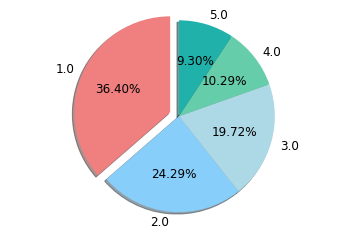

-----------------------------


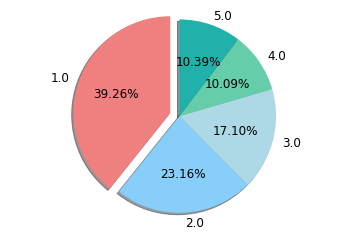

-----------------------------


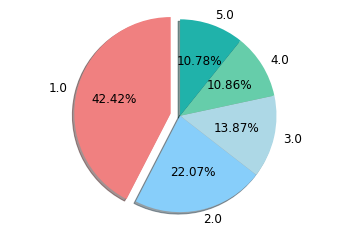

-----------------------------


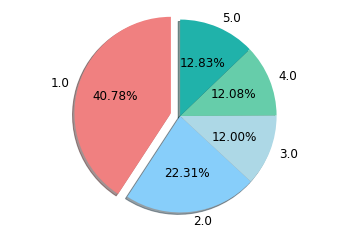

-----------------------------


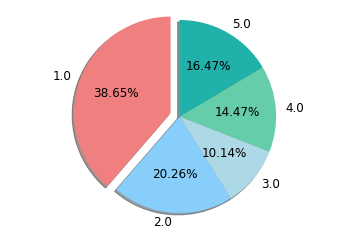

-----------------------------


In [151]:
pie(number1)
pie(number2)
pie(number3)
pie(number4)
pie(number5)

In [79]:
# 응답 평균 구하기
pivot2 = pd.pivot_table(data,values='QeA',index='age_group',aggfunc=np.mean)
pivot2.loc['50s'] = (pivot2.loc['50s'] + pivot2.loc['60s'] + pivot2.loc['+70s'])/3
pivot2 = pivot2.drop(['+70s', '60s'], axis=0)
pivot2

,QeA
age_group,
10s,2.318044
20s,2.291808
30s,2.252169
40s,2.338547
50s,2.595204


In [85]:
# 응답 시간 평균 구하기
pivot3 = pd.pivot_table(data,values='QeE',index='age_group',aggfunc=np.mean)
pivot3.loc['50s'] = (pivot3.loc['50s'] + pivot3.loc['60s'] + pivot3.loc['+70s'])/3
pivot3 = pivot3.drop(['60s', '+70s'], axis=0)
pivot3

,QeE
age_group,
10s,1723.810693
20s,2096.332129
30s,1806.126212
40s,2117.704811
50s,1764.016365


*  모든 연령대에서 1.0, 즉 동의하지 않는 비율이 가장 높게 나타났다.
*  제일 동의하지 않은 연령대는 30대이며, 가장 많이 동의한 연령대는 50대 이상이었다.
*  연령대에 따라 큰 차이가 나타나지는 않지만, 응답의 평균들을 비교해본 결과, 연령대가 높아질수록 동의하는 비율이 약간 높아지는 것을 알 수 있다.
*  응답 시간을 비교해보았을 때, 평균적으로 가장 오래 걸린 연령대는 40대, 가장 적게 걸린 연령대는 10대와 50대 이상이었다.

## QfA에 대한 답변 분석
Qf: 다른 사람에 거짓말하는 것은 변명의 여지가 없다. 

In [86]:
pivot4 = pd.pivot_table(data = data, index = "QfA", columns = "age_group", aggfunc = "size", fill_value = 0)
pivot4

age_group,+70s,10s,20s,30s,40s,50s,60s
QfA,,,,,,,
1.0,67,6915,6308,3221,1786,941,339
2.0,72,3744,3985,2262,1531,832,368
3.0,9,1203,1169,675,355,176,76
4.0,47,1217,1412,906,704,452,186
5.0,40,1136,1238,772,675,488,225


In [87]:
# 50,60,70대 이상을 50대로 합치기
pivot4['50s'] = pivot4['50s'] + pivot4['60s'] + pivot4['+70s']
pivot4

age_group,+70s,10s,20s,30s,40s,50s,60s
QfA,,,,,,,
1.0,67,6915,6308,3221,1786,1347,339
2.0,72,3744,3985,2262,1531,1272,368
3.0,9,1203,1169,675,355,261,76
4.0,47,1217,1412,906,704,685,186
5.0,40,1136,1238,772,675,753,225


In [89]:
# 60, 70대 제거
pivot5 = pivot4.drop(['60s', '+70s'], axis=1)
pivot5

age_group,10s,20s,30s,40s,50s
QfA,,,,,
1.0,6915,6308,3221,1786,1347
2.0,3744,3985,2262,1531,1272
3.0,1203,1169,675,355,261
4.0,1217,1412,906,704,685
5.0,1136,1238,772,675,753


In [90]:
# 숫자를 퍼센트 비율로 바꾸기
pivot5['10s'] = (pivot5['10s']/pivot5['10s'].sum()) * 100
pivot5['20s'] = (pivot5['20s']/pivot5['20s'].sum()) * 100
pivot5['30s'] = (pivot5['30s']/pivot5['30s'].sum()) * 100
pivot5['40s'] = (pivot5['40s']/pivot5['40s'].sum()) * 100
pivot5['50s'] = (pivot5['50s']/pivot5['50s'].sum()) * 100
pivot5

age_group,10s,20s,30s,40s,50s
QfA,,,,,
1.0,48.645797,44.699546,41.105156,35.359335,31.194998
2.0,26.338375,28.238379,28.866769,30.310830,29.458082
3.0,8.462891,8.283730,8.614089,7.028311,6.044465
4.0,8.561379,10.005669,11.562021,13.937834,15.863826
5.0,7.991558,8.772676,9.851965,13.363690,17.438629


In [152]:
# 파이차트
number1 = [6915, 3744, 1203, 1217, 1136]
number2 = [6308, 3985, 1169, 1412, 1238]
number3 = [3221, 2262, 675, 906, 772]
number4 = [1786, 1531, 355, 704, 675]
number5 = [1347, 1272, 261, 685, 753]

label = ['1.0', '2.0', '3.0', '4.0', '5.0']
colors = ['lightcoral', 'lightskyblue', 'lightblue','mediumaquamarine', 'lightseagreen']
explodes = (0.1, 0, 0, 0, 0) 

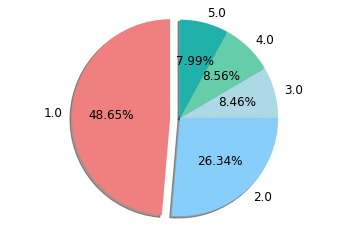

-----------------------------


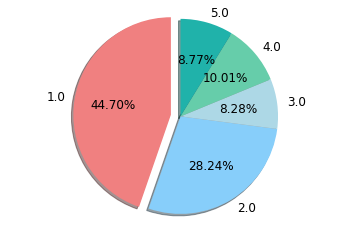

-----------------------------


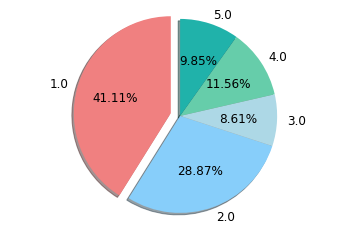

-----------------------------


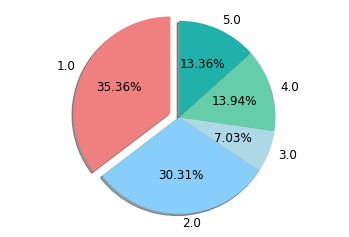

-----------------------------


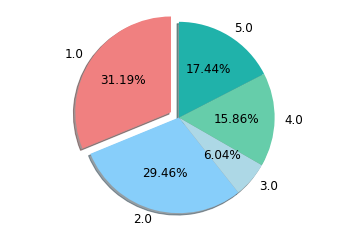

-----------------------------


In [153]:
pie(number1)
pie(number2)
pie(number3)
pie(number4)
pie(number5)

In [92]:
# 응답 평균 구하기
pivot6 = pd.pivot_table(data,values='QfA',index='age_group',aggfunc=np.mean)
pivot6.loc['50s'] = (pivot6.loc['50s'] + pivot6.loc['60s'] + pivot6.loc['+70s'])/3
pivot6 = pivot6.drop(['+70s', '60s'], axis=0)
pivot6

,QfA
age_group,
10s,2.009145
20s,2.099135
30s,2.201889
40s,2.396357
50s,2.625103


In [93]:
# 응답 시간 평균 구하기
pivot7 = pd.pivot_table(data,values='QfE',index='age_group',aggfunc=np.mean)
pivot7.loc['50s'] = (pivot7.loc['50s'] + pivot7.loc['60s'] + pivot7.loc['+70s'])/3
pivot7 = pivot7.drop(['60s', '+70s'], axis=0)
pivot7

,QfE
age_group,
10s,1815.778403
20s,1405.058319
30s,1945.447805
40s,3487.356167
50s,1349.663523


*  동의하지 않는 비율이 10대가 가장 높고, 연령대가 높아짐에 따라서 비율이 줄어든다. 동의하는 비율은 반대로 10대일수록 가장 낮으며 50대 이상이 가장 높은 것으로 나타났다. 10대를 제외한 모든 연령대에서 가장 적게 나온 응답은 3.0으로, 중립적인 의견을 가지고 있는 비율이 가장 적다는 것을 알 수 있다.
*  응답의 평균을 비교해보아도 10대가 가장 동의하지 않는 의견에 가까운 것을 알 수 있고, 연령대가 높아짐에 따라 동의하는 응답에 가까워지는 것을 알 수 있다.
*  응답 시간의 평균은 대부분 비슷하였지만, 40대가 특히 질문에 답하는 데 긴 시간이 걸렸다는 것을 알 수 있다. 50대 이상과 20대가 가장 짧은 평균 응답 시간이 걸렸다.

## tp03에 대한 답변 분석
tp03: 신뢰할 수 있는

In [94]:
pivot8 = pd.pivot_table(data = data, index = "tp03", columns = "age_group", aggfunc = "size", fill_value = 0)
pivot8

age_group,+70s,10s,20s,30s,40s,50s,60s
tp03,,,,,,,
0,110,3118,3222,2020,1541,1084,472
1,70,3900,4000,2442,1702,979,395
2,13,3017,2929,1512,831,353,122
3,12,1256,1184,562,281,137,51
4,12,1456,1349,658,368,154,56
5,3,884,885,395,209,97,42
6,3,475,465,203,74,47,21
7,12,109,78,44,45,38,35


In [95]:
# 50,60,70대 이상을 50대로 합치기
pivot8['50s'] = pivot8['50s'] + pivot8['60s'] + pivot8['+70s']
pivot8

age_group,+70s,10s,20s,30s,40s,50s,60s
tp03,,,,,,,
0,110,3118,3222,2020,1541,1666,472
1,70,3900,4000,2442,1702,1444,395
2,13,3017,2929,1512,831,488,122
3,12,1256,1184,562,281,200,51
4,12,1456,1349,658,368,222,56
5,3,884,885,395,209,142,42
6,3,475,465,203,74,71,21
7,12,109,78,44,45,85,35


In [96]:
# 60, 70대 제거
pivot9 = pivot8.drop(['60s', '+70s'], axis=1)
pivot9

age_group,10s,20s,30s,40s,50s
tp03,,,,,
0,3118,3222,2020,1541,1666
1,3900,4000,2442,1702,1444
2,3017,2929,1512,831,488
3,1256,1184,562,281,200
4,1456,1349,658,368,222
5,884,885,395,209,142
6,475,465,203,74,71
7,109,78,44,45,85


In [97]:
# 숫자를 퍼센트 비율로 바꾸기
pivot9['10s'] = (pivot9['10s']/pivot9['10s'].sum()) * 100
pivot9['20s'] = (pivot9['20s']/pivot9['20s'].sum()) * 100
pivot9['30s'] = (pivot9['30s']/pivot9['30s'].sum()) * 100
pivot9['40s'] = (pivot9['40s']/pivot9['40s'].sum()) * 100
pivot9['50s'] = (pivot9['50s']/pivot9['50s'].sum()) * 100
pivot9

age_group,10s,20s,30s,40s,50s
tp03,,,,,
0,21.934576,22.831633,25.778458,30.508810,38.582677
1,27.435807,28.344671,31.163859,33.696298,33.441408
2,21.224059,20.755385,19.295559,16.452188,11.301528
3,8.835737,8.390023,7.172027,5.563255,4.631774
4,10.242701,9.559240,8.397141,7.285686,5.141269
5,6.218783,6.271259,5.040837,4.137794,3.288560
6,3.341541,3.295068,2.590607,1.465056,1.644280
7,0.766796,0.552721,0.561511,0.890913,1.968504


In [154]:
# 파이차트
number1 = [3118, 3900, 3017, 1256, 1456, 884, 475, 109]
number2 = [3222, 4000, 2929, 1184, 1349, 885, 465, 78]
number3 = [2020, 2442, 1512, 562, 658, 395, 203, 44]
number4 = [1541, 1702, 831, 281, 368, 209, 74, 45]
number5 = [1666, 1444, 488, 200, 222, 142, 71, 85]

label = ['0', '1', '2', '3', '4', '5', '6', '7']
colors = ['aqua', 'lightcoral', 'lightblue','mediumaquamarine', 'lightseagreen', 'cyan', 'turquoise', 'dodgerblue']
explodes = (0, 0.1, 0, 0, 0, 0, 0 ,0) 

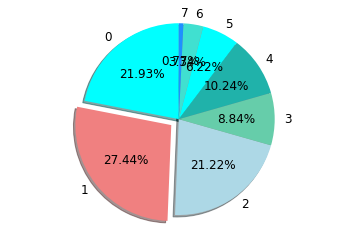

-----------------------------


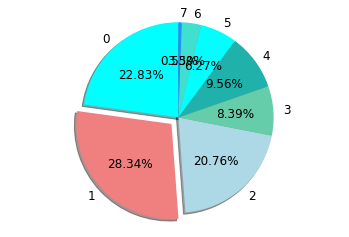

-----------------------------


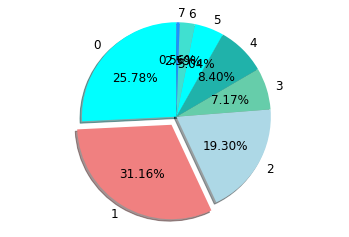

-----------------------------


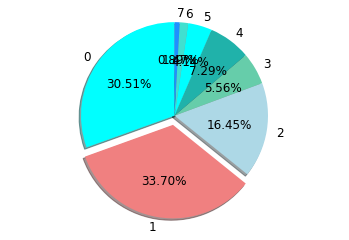

-----------------------------


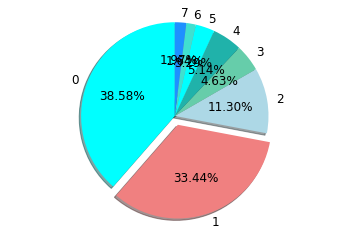

-----------------------------


In [155]:
pie(number1)
pie(number2)
pie(number3)
pie(number4)
pie(number5)

In [99]:
# 응답 평균 구하기
pivot10 = pd.pivot_table(data,values='tp03',index='age_group',aggfunc=np.mean)
pivot10.loc['50s'] = (pivot10.loc['50s'] + pivot10.loc['60s'] + pivot10.loc['+70s'])/3
pivot10 = pivot10.drop(['+70s', '60s'], axis=0)
pivot10

,tp03
age_group,
10s,1.938727
20s,1.882582
30s,1.695380
40s,1.481489
50s,1.299216


*  본인이 신뢰할 수 있는 성격이라고 답한 사람들의 비율은 10대가 가장 낮았고, 50대 이상이 가장 높았다. 즉, 연령대가 높아질수록 본인이 신뢰할 수 있는 성격의 소유자라고 생각하는 사람들이 많다는 것을 알 수 있다.
*  흥미로운 점은, 응답 평균을 구해보았을 때 모든 연령대에서 1점대의 점수가 나왔다는 점이다. 대부분 본인이 신뢰할 수 있는 성격을 가졌다고 생각하였지만, 여기서도 연령대가 높을수록 더 동의하는 경향이 높다는 것을 알 수 있다.


## tp04에 대한 답변 분석
tp04: 불안해하는, 쉽게 속상하게 만드는

In [101]:
pivot11 = pd.pivot_table(data = data, index = "tp04", columns = "age_group", aggfunc = "size", fill_value = 0)
pivot11

age_group,+70s,10s,20s,30s,40s,50s,60s
tp04,,,,,,,
0,11,2094,1838,842,402,185,65
1,18,2271,2291,1063,649,322,138
2,49,3060,3243,1867,1135,617,218
3,10,1109,1182,681,412,236,80
4,22,1490,1435,844,576,286,101
5,43,2056,2036,1299,977,602,264
6,61,2053,2030,1197,850,598,289
7,21,82,57,43,50,43,39


In [102]:
# 50,60,70대 이상을 50대로 합치기
pivot11['50s'] = pivot11['50s'] + pivot11['60s'] + pivot11['+70s']
pivot11

age_group,+70s,10s,20s,30s,40s,50s,60s
tp04,,,,,,,
0,11,2094,1838,842,402,261,65
1,18,2271,2291,1063,649,478,138
2,49,3060,3243,1867,1135,884,218
3,10,1109,1182,681,412,326,80
4,22,1490,1435,844,576,409,101
5,43,2056,2036,1299,977,909,264
6,61,2053,2030,1197,850,948,289
7,21,82,57,43,50,103,39


In [103]:
# 60, 70대 제거
pivot12 = pivot11.drop(['60s', '+70s'], axis=1)
pivot12

age_group,10s,20s,30s,40s,50s
tp04,,,,,
0,2094,1838,842,402,261
1,2271,2291,1063,649,478
2,3060,3243,1867,1135,884
3,1109,1182,681,412,326
4,1490,1435,844,576,409
5,2056,2036,1299,977,909
6,2053,2030,1197,850,948
7,82,57,43,50,103


In [104]:
# 숫자를 퍼센트 비율로 바꾸기
pivot12['10s'] = (pivot12['10s']/pivot12['10s'].sum()) * 100
pivot12['20s'] = (pivot12['20s']/pivot12['20s'].sum()) * 100
pivot12['30s'] = (pivot12['30s']/pivot12['30s'].sum()) * 100
pivot12['40s'] = (pivot12['40s']/pivot12['40s'].sum()) * 100
pivot12['50s'] = (pivot12['50s']/pivot12['50s'].sum()) * 100
pivot12

age_group,10s,20s,30s,40s,50s
tp04,,,,,
0,14.730918,13.024376,10.745278,7.958820,6.044465
1,15.976082,16.234410,13.565595,12.848941,11.069940
2,21.526556,22.980442,23.825932,22.470798,20.472441
3,7.801618,8.375850,8.690658,8.156801,7.549792
4,10.481885,10.168651,10.770801,11.403682,9.471978
5,14.463595,14.427438,16.577335,19.342704,21.051413
6,14.442490,14.384921,15.275651,16.828351,21.954609
7,0.576855,0.403912,0.548749,0.989903,2.385364


In [156]:
# 파이차트
number1 = [2094, 2271, 3060, 1109, 1490, 2056, 2053, 82]
number2 = [1838, 2291, 3243, 1182, 1435, 2036, 2030, 57]
number3 = [842, 1063, 1867, 681, 844, 1299, 1197, 43]
number4 = [402, 649, 1135, 412, 576, 977, 850, 50]
number5 = [261, 478, 884, 326, 409, 909, 948, 103]

label = ['0', '1', '2', '3', '4', '5', '6', '7']
colors = ['aqua', 'lightskyblue', 'lightcoral','mediumaquamarine', 'lightseagreen', 'cyan', 'turquoise', 'dodgerblue']
explodes = (0, 0, 0.1, 0, 0, 0, 0 ,0) 

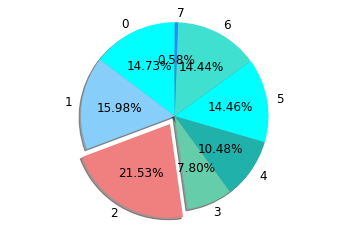

-----------------------------


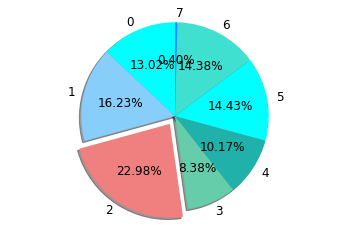

-----------------------------


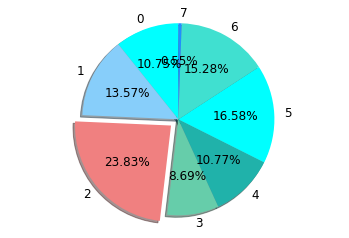

-----------------------------


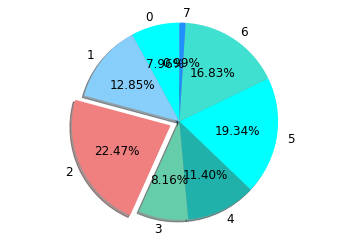

-----------------------------


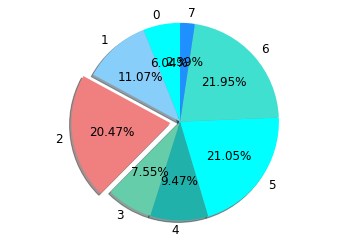

-----------------------------


In [157]:
pie(number1)
pie(number2)
pie(number3)
pie(number4)
pie(number5)

In [105]:
# 응답 평균 구하기
pivot13 = pd.pivot_table(data,values='tp04',index='age_group',aggfunc=np.mean)
pivot13.loc['50s'] = (pivot13.loc['50s'] + pivot13.loc['60s'] + pivot13.loc['+70s'])/3
pivot13 = pivot13.drop(['+70s', '60s'], axis=0)
pivot13

,tp04
age_group,
10s,2.873725
20s,2.892715
30s,3.087545
40s,3.324886
50s,3.822607


*  불안해하는 성격은 10대가 가장 많은 비율로 동의하고 50대 이상이 가장 적은 비율로 동의하는 것을 알 수 있다.
*  50대 이상을 제외한 모든 연령대에서 2번을 선택한 비중이 가장 높았고, 50대 이상은 6번을 선택한 비중이 가장 높은 것을 알 수 있다. 하지만 가장 높게 차지한 비율이 모두 20%대라는 점에서 불안해하는 성격에 대한 응답은 다른 응답들에 비해 골고루 퍼져있다는 것을 알 수 있다. 
*  응답의 평균을 구해보면 연령대가 높아질수록 동의하지 않는 비율이 높아지며, 10대와 50대 이상의 평균 응답은 1점 차이가 난다는 것을 알 수 있다.


# 최종 결론

*  QeA: 전반적으로 모든 연령대에서 잘 속는 사람이 매분마다 태어난다는 주장에 동의하지 않는 비율이 더 높았지만, 연령대가 높아질수록 위 주장에 동의하는 경향이 늘어났다. 
*  QeE: 평균적으로 가장 오래 걸린 연령대는 40대, 가장 적게 걸린 연령대는 10대와 50대 이상이었다.
*  QfA: 연령대가 높아질수록 다른 사람에게 거짓말하는 것은 변명의 여지가 없다고 생각한다.
*  QfE: 40대가 질문에 답하는 데 가장 긴 시간이 걸렸고, 50대 이상과 20대가 가장 짧았다.
*  tp03: 연령대가 높아질수록 본인이 신뢰할 수 있는 성격이라고 믿는 사람들이 많다.
*  tp04: 연령대가 어릴수록 불안해하는 성격에 더 강력하게 동의하는 비율이 높고 연령대가 높아질수록 점차 낮아진다.